In [1]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily, Hourly
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import mpl_toolkits


import geos
import time

import pandas as pd
import numpy as np

In [2]:
def get_coordinates(ort):
    geolocator = Nominatim(user_agent="Wetterstation")
    location = geolocator.geocode(ort)
    coordinates = (location.latitude, location.longitude)
    return coordinates  

def get_closest_weather_station(lat, lon, start, end):
    stations = Stations()
    stations = stations.nearby(lat, lon)
    stations = stations.inventory('hourly', (start, end))
    station = stations.fetch(1)
    return station

def get_data(station, start, end):
    data = Hourly(station, start=start, end=end)
    data = data.normalize()
    data = data.interpolate()
    data = data.fetch()
    data = data.loc[data.index >= start]
    data = data.loc[data.index <= end]
    return data
    

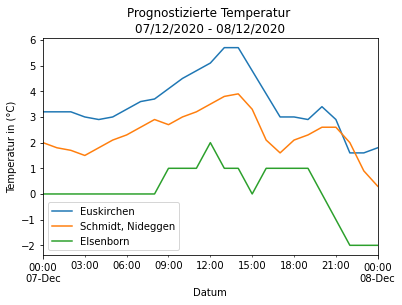

In [3]:
locations = ("Euskirchen", "Schmidt, Nideggen", "Elsenborn")
start = datetime(2020, 12, 7) 
end = datetime(2020, 12, 8)

for location in locations:
    lat, lon = get_coordinates(location)
    station = get_closest_weather_station(lat, lon, start, end)
    data = get_data(station, start, end)
    
    # Temperatur
    temp = data["temp"]
    temp.plot(label=location)
    plt.xlabel("Datum")
    plt.ylabel("Temperatur in (°C)")
    plt.title("Prognostizierte Temperatur " + "\n" + start.strftime("%d/%m/%Y") + " - " + end.strftime("%d/%m/%Y")) 
    plt.legend()
plt.show() 
    

In [401]:
print(get_coordinates("Euskirchen"))

(50.6612623, 6.7871219)


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2020-12-07 00:00:00,0.0,0.0,100.0,0.0,NaN,286.0,7.4,13.0,996.0,NaN,14.0
2020-12-07 01:00:00,0.0,0.0,100.0,0.1,NaN,285.0,7.4,14.8,996.0,NaN,14.0
2020-12-07 02:00:00,0.0,0.0,100.0,0.0,NaN,282.0,7.4,16.7,995.0,NaN,14.0
2020-12-07 03:00:00,0.0,0.0,100.0,0.3,NaN,273.0,7.4,16.7,995.0,NaN,14.0
2020-12-07 04:00:00,0.0,0.0,100.0,0.1,NaN,267.0,9.3,18.5,995.0,NaN,14.0
2020-12-07 05:00:00,0.0,0.0,100.0,0.1,NaN,267.0,9.3,18.5,995.0,NaN,14.0
2020-12-07 06:00:00,0.0,0.0,100.0,0.1,NaN,261.0,9.3,16.7,996.0,NaN,7.0
2020-12-07 07:00:00,0.0,0.0,100.0,0.2,NaN,251.0,9.3,16.7,996.0,NaN,14.0
2020-12-07 08:00:00,0.0,0.0,100.0,0.2,NaN,241.0,9.3,16.7,997.0,NaN,7.0
